### Columns available

In [42]:
import pandas as pd

# Load the combined file
# combined_file = "./chEMBL_initial/catB_chEMBL.tsv"  # Replace with the path to your combined .tsv file
# combined_file = "./chEMBL_initial/catS_chEMBL.tsv"  # Replace with the path to your combined .tsv file
# combined_file = "./chEMBL_initial/catD_chEMBL.tsv"  # Replace with the path to your combined .tsv file
combined_file = "./chEMBL_initial/catK_chEMBL.tsv"  # Replace with the path to your combined .tsv file

df = pd.read_csv(combined_file, sep="\t")

# Get column names as a list
column_names = df.columns.tolist()

# Print the column names
print(column_names)


['Molecule ChEMBL ID', 'Molecule Name', 'Molecule Max Phase', 'Molecular Weight', '#RO5 Violations', 'AlogP', 'Compound Key', 'Smiles', 'Standard Type', 'Standard Relation', 'Standard Value', 'Standard Units', 'pChEMBL Value', 'Data Validity Comment', 'Comment', 'Uo Units', 'Ligand Efficiency BEI', 'Ligand Efficiency LE', 'Ligand Efficiency LLE', 'Ligand Efficiency SEI', 'Potential Duplicate', 'Assay ChEMBL ID', 'Assay Description', 'Assay Type', 'BAO Format ID', 'BAO Label', 'Assay Organism', 'Assay Tissue ChEMBL ID', 'Assay Tissue Name', 'Assay Cell Type', 'Assay Subcellular Fraction', 'Assay Parameters', 'Assay Variant Accession', 'Assay Variant Mutation', 'Target ChEMBL ID', 'Target Name', 'Target Organism', 'Target Type', 'Document ChEMBL ID', 'Source ID', 'Source Description', 'Document Journal', 'Document Year', 'Cell ChEMBL ID', 'Properties', 'Action Type', 'Standard Text Value', 'Value']


### Selecting main columns

In [43]:
import pandas as pd

# Load the original dataset
# df = pd.read_csv('./chEMBL_initial/catB_chEMBL.tsv', sep='\t')
# df = pd.read_csv('./chEMBL_initial/catS_chEMBL.tsv', sep='\t')
# df = pd.read_csv('./chEMBL_initial/catD_chEMBL.tsv', sep='\t')
df = pd.read_csv('./chEMBL_initial/catK_chEMBL.tsv', sep='\t')


# Select the relevant columns
columns_to_keep = [ 
    'Smiles','Standard Type', 'Standard Relation', 'Standard Value', 'Standard Units', 'Assay Description',
    
]
df_filtered = df[columns_to_keep]

# Save the filtered data to a new TSV file
# df_filtered.to_csv('./Intermediate_chEMBL/Limited_Columns_data_B.tsv', sep='\t', index=False)
# df_filtered.to_csv('./Intermediate_chEMBL/Limited_Columns_data_S.tsv', sep='\t', index=False)
# df_filtered.to_csv('./Intermediate_chEMBL/Limited_Columns_data_D.tsv', sep='\t', index=False)
df_filtered.to_csv('./Intermediate_chEMBL/Limited_Columns_data_K.tsv', sep='\t', index=False)


print("Filtered data saved to 'filtered_data.tsv'.")


Filtered data saved to 'filtered_data.tsv'.


### Selecting human and cathepsin (x)

In [44]:
import pandas as pd

# Function to filter rows based on the presence of both "human" and "cathepsin b" in the Assay Description column
def filter_assay_description(input_file, output_file):
    # Load the TSV file
    df = pd.read_csv(input_file, sep='\t')

    # Filter rows where Assay Description contains both "human" and "cathepsin b" (case-insensitive)
    filtered_df = df[df['Assay Description'].str.contains('human', case=False, na=False) & 
                     df['Assay Description'].str.contains('cathepsin K', case=False, na=False)]

    # Save the filtered dataframe to a new TSV file
    filtered_df.to_csv(output_file, sep='\t', index=False)

# Example usage
# input_file = './Intermediate_chEMBL/Limited_Columns_data_B.tsv'  # Replace with your input TSV file path
# output_file = './Intermediate_chEMBL/human_cathepsin_B_data.tsv'  # Replace with desired output file path

# input_file = './Intermediate_chEMBL/Limited_Columns_data_S.tsv'  # Replace with your input TSV file path
# output_file = './Intermediate_chEMBL/human_cathepsin_S_data.tsv'  # Replace with desired output file path

# input_file = './Intermediate_chEMBL/Limited_Columns_data_D.tsv'  # Replace with your input TSV file path
# output_file = './Intermediate_chEMBL/human_cathepsin_D_data.tsv'  # Replace with desired output file path

input_file = './Intermediate_chEMBL/Limited_Columns_data_K.tsv'  # Replace with your input TSV file path
output_file = './Intermediate_chEMBL/human_cathepsin_K_data.tsv'  # Replace with desired output file path

filter_assay_description(input_file, output_file)


### Converting to bindingdb format

In [45]:
import pandas as pd
import re

# Function to clean and convert the data
def convert_data_without_potency(input_file, output_file):
    # Load the TSV file
    df = pd.read_csv(input_file, sep='\t')
    
    # Filter out rows where 'Assay Description' doesn't contain 'human' and 'cathepsin b'
    df = df[df['Assay Description'].str.contains('human', case=False, na=False) & 
            df['Assay Description'].str.contains('cathepsin K', case=False, na=False)]
    
    # Extract target (e.g., 'Cathepsin B') from Assay Description
    df['Target Name'] = df['Assay Description'].apply(lambda x: re.search(r'cathepsin K', x, re.IGNORECASE).group(0).title())
    
    # Combine IC50 values with <, >, or = (as in the 'Standard Relation' column)
    df['Value'] = df['Standard Relation'] 
    
    df['IC50 (nM)'] = df['Standard Value'].astype(str)
    
    # Add Target Source Organism (fixed value "Homo sapiens")
    df['Target Source Organism According to Curator or DataSource'] = 'Homo sapiens'
    
    # Rename columns
    df['Ligand SMILES'] = df['Smiles']
    
    # Select relevant columns and rearrange
    final_df = df[['Target Name', 'IC50 (nM)','Value', 'Target Source Organism According to Curator or DataSource', 'Ligand SMILES']]
    
    # Save the final result to a new TSV file
    final_df.to_csv(output_file, sep='\t', index=False)

# Example usage
# input_file = './Intermediate_chEMBL/human_cathepsin_B_data.tsv'  # Replace with your input file path
# output_file = './Intermediate_chEMBL/converted_assay_data_without_potency_B.tsv'  # Replace with your desired output file path

# input_file = './Intermediate_chEMBL/human_cathepsin_S_data.tsv'  # Replace with your input file path
# output_file = './Intermediate_chEMBL/converted_assay_data_without_potency_S.tsv'  # Replace with your desired output file path

# input_file = './Intermediate_chEMBL/human_cathepsin_D_data.tsv'  # Replace with your input file path
# output_file = './Intermediate_chEMBL/converted_assay_data_without_potency_D.tsv'  # Replace with your desired output file path

input_file = './Intermediate_chEMBL/human_cathepsin_K_data.tsv'  # Replace with your input file path
output_file = './Intermediate_chEMBL/converted_assay_data_without_potency_K.tsv'  # Replace with your desired output file path

convert_data_without_potency(input_file, output_file)


### removing nan

In [46]:
import pandas as pd

# Load the TSV file into a DataFrame
# file_path = "./Intermediate_chEMBL/converted_assay_data_without_potency_B.tsv"  # Replace with your file path
# file_path = "./Intermediate_chEMBL/converted_assay_data_without_potency_S.tsv"  # Replace with your file path
# file_path = "./Intermediate_chEMBL/converted_assay_data_without_potency_D.tsv"  # Replace with your file path
file_path = "./Intermediate_chEMBL/converted_assay_data_without_potency_K.tsv"  # Replace with your file path

data = pd.read_csv(file_path, sep="\t")

# Remove rows where 'IC50 (nM)' has NaN values
data = data.dropna(subset=['IC50 (nM)'])
data.to_csv(file_path,sep='\t', index=False)

### Balancing values +-0.1

In [47]:
import pandas as pd

# Load the TSV file into a DataFrame
# file_path = './Intermediate_chEMBL/converted_assay_data_without_potency_B.tsv'
# file_path = './Intermediate_chEMBL/converted_assay_data_without_potency_S.tsv'
# file_path = './Intermediate_chEMBL/converted_assay_data_without_potency_D.tsv'
file_path = './Intermediate_chEMBL/converted_assay_data_without_potency_K.tsv'

df = pd.read_csv(file_path, sep='\t')

# Modify the IC50 column based on the Value column
def modify_ic50(row):
    if row['Value'] == "'='":
        return row['IC50 (nM)']  # Keep the same
    elif row['Value'] == "'>'":
        return row['IC50 (nM)'] + 0.1  # Add 0.1
    else:  # Handle other cases (assume '<')
        return row['IC50 (nM)'] - 0.1  # Subtract 0.1

# Apply the function to the DataFrame
df['IC50 (nM)'] = df.apply(modify_ic50, axis=1)

# Save the updated DataFrame to a new TSV file
# output_file_path = './Intermediate_chEMBL/updated_after_adding_substraction_B.tsv'
# output_file_path = './Intermediate_chEMBL/updated_after_adding_substraction_S.tsv'
# output_file_path = './Intermediate_chEMBL/updated_after_adding_substraction_D.tsv'
output_file_path = './Intermediate_chEMBL/updated_after_adding_substraction_K.tsv'

df.to_csv(output_file_path, sep='\t', index=False)

print(f"Updated file saved to {output_file_path}")


Updated file saved to ./Intermediate_chEMBL/updated_after_adding_substraction_K.tsv


### removing values column (not needed now)

In [48]:
import pandas as pd

# Load the TSV file into a DataFrame
# file_path = './Intermediate_chEMBL/updated_after_adding_substraction_B.tsv'
# file_path = './Intermediate_chEMBL/updated_after_adding_substraction_S.tsv'
# file_path = './Intermediate_chEMBL/updated_after_adding_substraction_D.tsv'
file_path = './Intermediate_chEMBL/updated_after_adding_substraction_K.tsv'

df = pd.read_csv(file_path, sep='\t')

# Remove the 'Value' column
df = df.drop(columns=['Value'])

# Save the updated DataFrame to a new TSV file
# output_file_path = './Intermediate_chEMBL/final_without_potency_B.tsv'
# output_file_path = './Intermediate_chEMBL/final_without_potency_S.tsv'
# output_file_path = './Intermediate_chEMBL/final_without_potency_D.tsv'
output_file_path = './Intermediate_chEMBL/final_without_potency_K.tsv'

df.to_csv(output_file_path, sep='\t', index=False)

print(f"File saved after removing 'Value' column: {output_file_path}")


File saved after removing 'Value' column: ./Intermediate_chEMBL/final_without_potency_K.tsv


### adding potency

In [49]:
# Function to categorize based on IC50 values (output as numeric potency)
def categorize_potency(ic50):
    if ic50 < 1:
        return "3"  # Potent
    elif 1 <= ic50 < 100:
        return "2"  # Active
    elif 100 <= ic50 < 1000:
        return "1"  # Intermediate
    elif ic50 >= 1000:
        return "0"  # Inactive
    else:
        return "-1"  # Unknown

def update_ic50_in_tsv(input_file, output_file):
    # Read the TSV file
    df = pd.read_csv(input_file, sep='\t')

    # Add Potency column based on updated IC50 values
    df['Potency'] = df['IC50 (nM)'].apply(categorize_potency)

    # Save the updated dataframe to a new TSV file
    df.to_csv(output_file, sep='\t', index=False)

# Example usage
# input_file = './Intermediate_chEMBL/final_without_potency_B.tsv'  # Replace with your input TSV file path
# output_file = './Intermediate_chEMBL/final_chembl_B.tsv'  # Replace with desired output file path

# input_file = './Intermediate_chEMBL/final_without_potency_S.tsv'  # Replace with your input TSV file path
# output_file = './Intermediate_chEMBL/final_chembl_S.tsv'  # Replace with desired output file path

# input_file = './Intermediate_chEMBL/final_without_potency_D.tsv'  # Replace with your input TSV file path
# output_file = './Intermediate_chEMBL/final_chembl_D.tsv'  # Replace with desired output file path

input_file = './Intermediate_chEMBL/final_without_potency_K.tsv'  # Replace with your input TSV file path
output_file = './Intermediate_chEMBL/final_chembl_K.tsv'  # Replace with desired output file path

update_ic50_in_tsv(input_file, output_file)


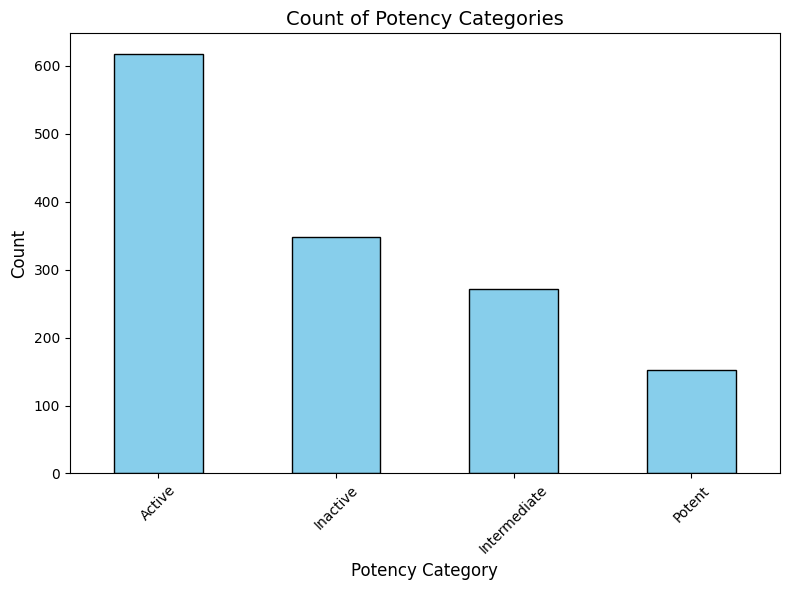

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to categorize based on IC50 values (output as potency categories)
def categorize_potency(ic50):
    if ic50 < 1:
        return "Potent"
    elif 1 <= ic50 < 100:
        return "Active"
    elif 100 <= ic50 < 1000:
        return "Intermediate"
    elif ic50 >= 1000:
        return "Inactive"
    else:
        return "Unknown"

# Load data from TSV file
# input_file = './Intermediate_chEMBL/final_chembl_B.tsv'  # Replace with your input TSV file path
# input_file = './Intermediate_chEMBL/final_chembl_S.tsv'  # Replace with your input TSV file path
# input_file = './Intermediate_chEMBL/final_chembl_D.tsv'  # Replace with your input TSV file path
input_file = './Intermediate_chEMBL/final_chembl_K.tsv'  # Replace with your input TSV file path

df = pd.read_csv(input_file, sep='\t')

# Add Potency column based on IC50 values
df['Potency'] = df['IC50 (nM)'].apply(lambda x: categorize_potency(float(x)))

# Count the occurrences of each category
potency_counts = df['Potency'].value_counts()

# Plotting the count of potency categories
plt.figure(figsize=(8, 6))
potency_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Count of Potency Categories', fontsize=14)
plt.xlabel('Potency Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
